<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHETH L.U.J & SIR M.V COLLEGE

T096 SIDDHI NAIK

dataset of customers with:

Annual Income

Spending Score

In [ ]:
import pandas as pd

data = {
    'Income':  [15, 16, 17, 18, 19, 25, 26, 27, 45, 46, 47, 48, 58, 59, 60, 61,65,10,23,13,43,23],
    'Score':   [39, 81, 6, 77, 40, 76, 94, 15, 14, 73, 82, 25, 37, 92, 48, 65,23,53,15,24,24,24]
}

df = pd.DataFrame(data)
print(df)


    Income  Score
0       15     39
1       16     81
2       17      6
3       18     77
4       19     40
5       25     76
6       26     94
7       27     15
8       45     14
9       46     73
10      47     82
11      48     25
12      58     37
13      59     92
14      60     48
15      61     65
16      65     23
17      10     53
18      23     15
19      13     24
20      43     24
21      23     24


ELBOW METHOD — Determine Optimal K

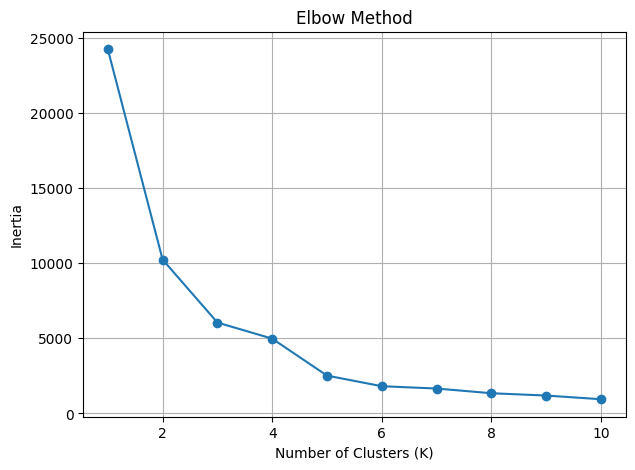

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

# Test K = 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


X-axis: Number of clusters (K = 1 to 10)

Y-axis: Inertia (sum of distances of points to their cluster center)

Inertia measures how tight the clusters are.

High inertia → bad clustering

Low inertia → good clustering

But if you increase K, inertia always decreases — so you need a way to know when to stop increasing K.


The Elbow Method was used to determine the optimal number of clusters.

The inertia decreases sharply between K = 1 to 5, after which the curve flattens.

The “elbow” occurs around K = 4 or K = 5, indicating that adding more clusters beyond this point does not significantly improve clustering performance.

Therefore, K = 5 was chosen as the optimal number of clusters for K-Means.

SILHOUETTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print("K =", k, "  Silhouette Score =", score)


K = 2   Silhouette Score = 0.47578424179038786
K = 3   Silhouette Score = 0.46568599350998185
K = 4   Silhouette Score = 0.3606912043124351
K = 5   Silhouette Score = 0.4892947021496539
K = 6   Silhouette Score = 0.48063696358550023


Score closer to 1 → well-separated clusters

Score near 0 → overlapping

Best K = the value giving highest silhouette score
Best score = 0.4893 at K = 5

This means 5 clusters gives the tightest, most well-separated groups.

In [ ]:
kmeans_final = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans_final.fit_predict(df)

print(df)


    Income  Score  Cluster
0       15     39        2
1       16     81        1
2       17      6        2
3       18     77        1
4       19     40        2
5       25     76        1
6       26     94        1
7       27     15        2
8       45     14        0
9       46     73        1
10      47     82        1
11      48     25        0
12      58     37        0
13      59     92        1
14      60     48        0
15      61     65        1
16      65     23        0
17      10     53        2
18      23     15        2
19      13     24        2
20      43     24        0
21      23     24        2


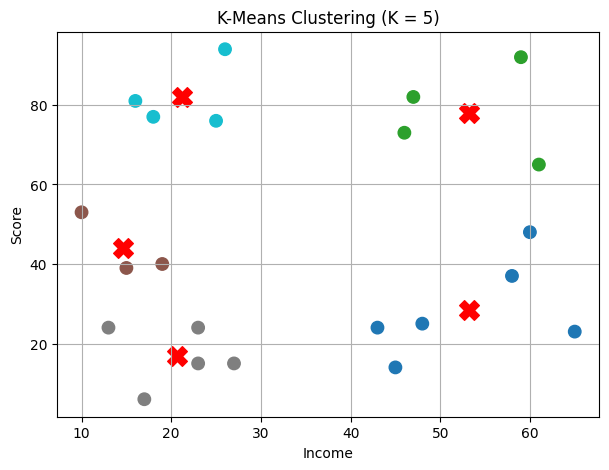

In [ ]:
X = df[['Income', 'Score']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)


import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['Income'], df['Score'],
            c=df['Cluster'], cmap='tab10', s=80)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],
            c='red', s=200, marker='X')

plt.title("K-Means Clustering (K = 5)")
plt.xlabel("Income")
plt.ylabel("Score")
plt.grid(True)
plt.show()



The scatter plot shows the result of applying K-Means clustering with K = 5 on the dataset containing Income and Score values.
Each colored group represents a cluster, and the red X marks indicate the centroid (center) of each cluster.

The model successfully separates the data into five distinct segments, each showing different patterns of customer behavior.

Cluster 1 — Low Income, High Score

(Points around: Income 10–20, Score 75–95)

Customers who earn less but have high spending scores.

Indicates highly engaged spenders despite limited income.
Cluster 2 — Low Income, Low Score

(Points around: Income 15–25, Score 5–25)

Low-income customers with low spending.

Represents budget-restricted or non-engaged customers.
Cluster 3 — Low to Medium Income, Medium Score

(Points around: Income 10–20, Score 35–55)

Moderate spending but limited income.

These customers show average engagement.

Cluster 4 — High Income, High Score

(Points around: Income 40–65, Score 70–95)

High spenders with high income.

Represents the premium customer segment — valuable for targeted marketing.

Cluster 5 — High Income, Low/Medium Score

(Points around: Income 40–65, Score 15–35)

Customers who earn a lot but spend comparatively less.

Might be saving-oriented or prefer spending in other categories.

Dataset:
     Income  Score
0       15     39
1       16     81
2       17      6
3       18     77
4       19     40
5       25     76
6       26     94
7       27     15
8       45     14
9       46     73
10      47     82
11      48     25
12      58     37
13      59     92
14      60     48
15      61     65
16      65     23
17      10     53
18      23     15
19      13     24
20      43     24
21      23     24

Example Euclidean distance between point 0 and 1: 42.01190307520001

From-scratch K-means centroids (k=3):
 [[25.72727273 25.36363636]
 [33.85714286 82.14285714]
 [61.         43.25      ]]
Cluster labels from scratch:
 [0 1 0 1 0 1 1 0 0 1 1 0 2 1 2 2 2 0 0 0 0 0]

Manual SSE for k=3 (from-scratch k-means): 6737.191558441557

Dunn Index for k=3 (from-scratch labels): 0.2980881053857551

Dunn index for k = 2 to 6 (using sklearn KMeans):
k = 2, Dunn index = 0.2374
k = 3, Dunn index = 0.3566
k = 4, Dunn index = 0.1556
k = 5, Dunn index = 0.4072
k = 6, Dunn index = 0.5589

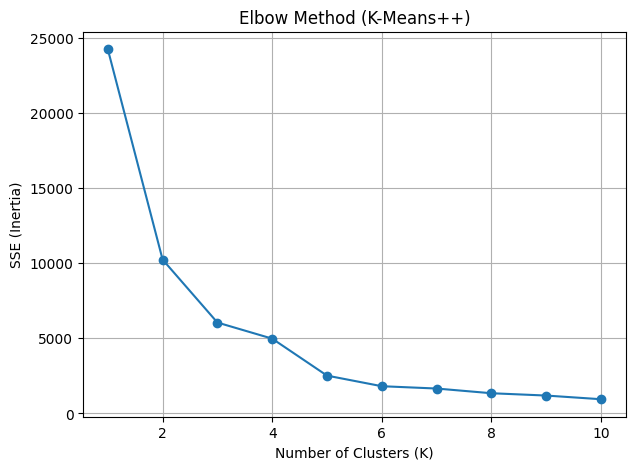


Final clustering with k-means++ (k=3):
    Income  Score  Cluster
0       15     39        2
1       16     81        1
2       17      6        2
3       18     77        1
4       19     40        2
5       25     76        1
6       26     94        1
7       27     15        2
8       45     14        0
9       46     73        1
10      47     82        1
11      48     25        0
12      58     37        0
13      59     92        1
14      60     48        0
15      61     65        1
16      65     23        0
17      10     53        2
18      23     15        2
19      13     24        2
20      43     24        0
21      23     24        2


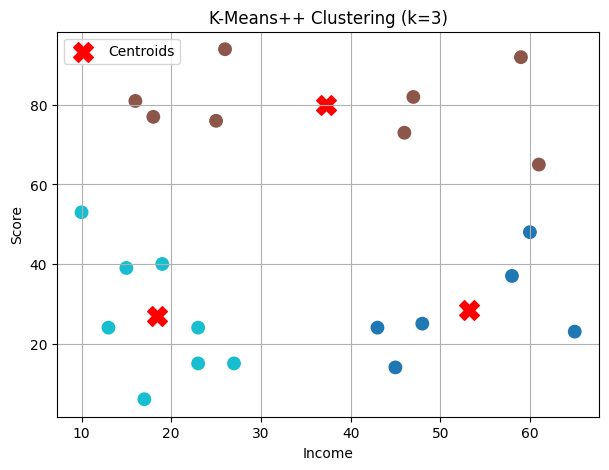

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ============================================================
# 1. DATASET
# ============================================================
data = {
    'Income':  [15, 16, 17, 18, 19, 25, 26, 27, 45, 46, 47, 48, 58, 59, 60, 61, 65, 10, 23, 13, 43, 23],
    'Score':   [39, 81, 6, 77, 40, 76, 94, 15, 14, 73, 82, 25, 37, 92, 48, 65, 23, 53, 15, 24, 24, 24]
}

df = pd.DataFrame(data)
X = df[['Income', 'Score']].values
print("Dataset:\n", df)

# ============================================================
# 2. EUCLIDEAN DISTANCE FUNCTION (distance between data points)
# ============================================================
def euclidean_distance(p, q):
    # p, q are numpy arrays [x1, x2]
    return np.sqrt(np.sum((p - q) ** 2))

# Example: distance between first two points
print("\nExample Euclidean distance between point 0 and 1:",
      euclidean_distance(X[0], X[1]))

# ============================================================
# 3. FROM-SCRATCH K-MEANS (CENTROID-BASED + EM STEPS)
# ============================================================
def kmeans_from_scratch(X, k, max_iters=10):
    # Randomly choose k initial centroids from data
    np.random.seed(0)
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for it in range(max_iters):
        # ------------- E-STEP: assign points to nearest centroid -------------
        labels = []
        for point in X:
            dists = [euclidean_distance(point, c) for c in centroids]
            labels.append(np.argmin(dists))
        labels = np.array(labels)

        # ------------- M-STEP: recompute centroids as mean of clusters -------------
        new_centroids = []
        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                # if a cluster gets empty, re-initialize randomly
                new_centroids.append(X[np.random.randint(0, len(X))])
        new_centroids = np.array(new_centroids)

        # Stop if centroids do not change
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

k = 3
centroids_scratch, labels_scratch = kmeans_from_scratch(X, k)

print("\nFrom-scratch K-means centroids (k=3):\n", centroids_scratch)
print("Cluster labels from scratch:\n", labels_scratch)

# ============================================================
# 4. SSE (Sum of Squared Errors) MANUAL
# ============================================================
def compute_sse(X, centroids, labels):
    sse = 0.0
    for i, point in enumerate(X):
        c = centroids[labels[i]]
        sse += np.sum((point - c) ** 2)
    return sse

sse_scratch = compute_sse(X, centroids_scratch, labels_scratch)
print("\nManual SSE for k=3 (from-scratch k-means):", sse_scratch)

# ============================================================
# 5. DUNN INDEX (DNN INDEX)
# ============================================================
def dunn_index(X, labels):
    # Unique clusters
    clusters = np.unique(labels)

    # Intra-cluster diameter (max distance inside each cluster)
    max_diameter = 0
    for c in clusters:
        points = X[labels == c]
        if len(points) < 2:
            continue
        for i in range(len(points)):
            for j in range(i+1, len(points)):
                d = euclidean_distance(points[i], points[j])
                if d > max_diameter:
                    max_diameter = d

    # Inter-cluster minimum distance (min distance between points of different clusters)
    min_intercluster = np.inf
    for i, ci in enumerate(clusters):
        for cj in clusters[i+1:]:
            points_i = X[labels == ci]
            points_j = X[labels == cj]
            for p in points_i:
                for q in points_j:
                    d = euclidean_distance(p, q)
                    if d < min_intercluster:
                        min_intercluster = d

    if max_diameter == 0:
        return 0
    return min_intercluster / max_diameter

dunn_k3 = dunn_index(X, labels_scratch)
print("\nDunn Index for k=3 (from-scratch labels):", dunn_k3)

# You can also compute Dunn index for different k values using sklearn labels:
from sklearn.cluster import KMeans

print("\nDunn index for k = 2 to 6 (using sklearn KMeans):")
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels_k = kmeans.fit_predict(X)
    dunn_k = dunn_index(X, labels_k)
    print(f"k = {k}, Dunn index = {dunn_k:.4f}")

# ============================================================
# 6. ELBOW METHOD (SSE / INERTIA) WITH K-MEANS++
# ============================================================
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # this is SSE

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method (K-Means++)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

# ============================================================
# 7. FINAL K-MEANS++ CLUSTERING AND PLOTTING
# ============================================================
best_k = 3  # choose based on elbow / Dunn / silhouette
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=0)
df['Cluster'] = kmeans_final.fit_predict(X)
centers = kmeans_final.cluster_centers_

print("\nFinal clustering with k-means++ (k=3):")
print(df)

plt.figure(figsize=(7,5))
plt.scatter(df['Income'], df['Score'],
            c=df['Cluster'], cmap='tab10', s=80)

plt.scatter(centers[:,0], centers[:,1],
            c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means++ Clustering (k=3)")
plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# --- Euclidean distance formula ---
def euclidean_distance(p, q):
    # p and q are 1D points like [Income, Score]
    return np.sqrt(np.sum((p - q) ** 2))

# Example: distance between first two points
p0 = df[['Income', 'Score']].iloc[0].values
p1 = df[['Income', 'Score']].iloc[1].values
print("Euclidean distance between point 0 and 1:", euclidean_distance(p0, p1))


Euclidean distance between point 0 and 1: 42.01190307520001


In [ ]:
X = df[['Income', 'Score']].values  # ensure X is a NumPy array

def kmeans_from_scratch(X, k, max_iters=10):
    np.random.seed(0)
    # Randomly pick k initial centroids from data
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for it in range(max_iters):
        # ----------------- E-STEP: assign to nearest centroid -----------------
        labels = []
        for point in X:
            dists = [euclidean_distance(point, c) for c in centroids]
            labels.append(np.argmin(dists))
        labels = np.array(labels)

        # ----------------- M-STEP: recompute centroids -----------------------
        new_centroids = []
        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                # if a cluster gets empty, reassign randomly
                new_centroids.append(X[np.random.randint(0, len(X))])
        new_centroids = np.array(new_centroids)

        # stop if centroids don’t move
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Example: k = 3
centroids_scratch, labels_scratch = kmeans_from_scratch(X, k=3)
print("\nFrom-scratch K-Means centroids (k=3):\n", centroids_scratch)
print("Labels from scratch:\n", labels_scratch)



From-scratch K-Means centroids (k=3):
 [[25.72727273 25.36363636]
 [33.85714286 82.14285714]
 [61.         43.25      ]]
Labels from scratch:
 [0 1 0 1 0 1 1 0 0 1 1 0 2 1 2 2 2 0 0 0 0 0]


In [ ]:
def compute_sse(X, centroids, labels):
    sse = 0.0
    for i, point in enumerate(X):
        c = centroids[labels[i]]
        sse += np.sum((point - c) ** 2)
    return sse

sse_scratch = compute_sse(X, centroids_scratch, labels_scratch)
print("\nManual SSE for from-scratch K-Means (k=3):", sse_scratch)



Manual SSE for from-scratch K-Means (k=3): 6737.191558441557


In [ ]:
def dunn_index(X, labels):
    clusters = np.unique(labels)

    # max intra-cluster distance (diameter)
    max_diameter = 0
    for c in clusters:
        points = X[labels == c]
        if len(points) < 2:
            continue
        for i in range(len(points)):
            for j in range(i+1, len(points)):
                d = euclidean_distance(points[i], points[j])
                if d > max_diameter:
                    max_diameter = d

    # min inter-cluster distance
    min_inter = np.inf
    for i, ci in enumerate(clusters):
        for cj in clusters[i+1:]:
            points_i = X[labels == ci]
            points_j = X[labels == cj]
            for p in points_i:
                for q in points_j:
                    d = euclidean_distance(p, q)
                    if d < min_inter:
                        min_inter = d

    if max_diameter == 0:
        return 0
    return min_inter / max_diameter

dunn_scratch = dunn_index(X, labels_scratch)
print("\nDunn Index for from-scratch K-Means (k=3):", dunn_scratch)



Dunn Index for from-scratch K-Means (k=3): 0.2980881053857551


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
# ---- Dataset ----
data = {
    'Income':  [15, 16, 17, 18, 19, 25, 26, 27, 45, 46, 47, 48, 58, 59, 60, 61, 65, 10, 23, 13, 43, 23],
    'Score':   [39, 81, 6, 77, 40, 76, 94, 15, 14, 73, 82, 25, 37, 92, 48, 65, 23, 53, 15, 24, 24, 24]
}
df = pd.DataFrame(data)
X = df[['Income', 'Score']].values   # numpy array for clustering

print(df)


    Income  Score
0       15     39
1       16     81
2       17      6
3       18     77
4       19     40
5       25     76
6       26     94
7       27     15
8       45     14
9       46     73
10      47     82
11      48     25
12      58     37
13      59     92
14      60     48
15      61     65
16      65     23
17      10     53
18      23     15
19      13     24
20      43     24
21      23     24


In [ ]:
# ---- Euclidean distance function ----
def euclidean_distance(p, q):
    # p, q are 1D numpy arrays: [Income, Score]
    return np.sqrt(np.sum((p - q) ** 2))

# small demo
p0 = X[0]
p1 = X[1]
print("Distance between point 0 and 1 =", euclidean_distance(p0, p1))


Distance between point 0 and 1 = 42.01190307520001


In [ ]:
def kmeans_from_scratch(X, k, max_iters=20, random_state=0):
    np.random.seed(random_state)

    # ---- initialize centroids (random points from data) ----
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for it in range(max_iters):
        # ------------ E-STEP: assign each point to nearest centroid ------------
        labels = []
        for point in X:
            dists = [euclidean_distance(point, c) for c in centroids]
            labels.append(np.argmin(dists))
        labels = np.array(labels)

        # ------------ M-STEP: update centroids as mean of each cluster ----------
        new_centroids = []
        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                # if a cluster becomes empty, reinitialize that centroid
                new_centroids.append(X[np.random.randint(0, len(X))])
        new_centroids = np.array(new_centroids)

        # stop if no change
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# run for k = 3 as example
centroids_scratch, labels_scratch = kmeans_from_scratch(X, k=3)
print("Centroids (from scratch):\n", centroids_scratch)
print("Cluster labels (from scratch):\n", labels_scratch)


Centroids (from scratch):
 [[25.72727273 25.36363636]
 [33.85714286 82.14285714]
 [61.         43.25      ]]
Cluster labels (from scratch):
 [0 1 0 1 0 1 1 0 0 1 1 0 2 1 2 2 2 0 0 0 0 0]


In [ ]:
def compute_sse(X, centroids, labels):
    sse = 0.0
    for i, point in enumerate(X):
        c = centroids[labels[i]]
        sse += np.sum((point - c) ** 2)
    return sse

sse_scratch = compute_sse(X, centroids_scratch, labels_scratch)
print("Manual SSE (from-scratch k-means, k=3) =", sse_scratch)


Manual SSE (from-scratch k-means, k=3) = 6737.191558441557


In [ ]:
def dunn_index(X, labels):
    clusters = np.unique(labels)

    # max intra-cluster distance (diameter)
    max_diameter = 0
    for c in clusters:
        points = X[labels == c]
        if len(points) < 2:
            continue
        for i in range(len(points)):
            for j in range(i+1, len(points)):
                d = euclidean_distance(points[i], points[j])
                if d > max_diameter:
                    max_diameter = d

    # min inter-cluster distance
    min_inter = np.inf
    for i, ci in enumerate(clusters):
        for cj in clusters[i+1:]:
            points_i = X[labels == ci]
            points_j = X[labels == cj]
            for p in points_i:
                for q in points_j:
                    d = euclidean_distance(p, q)
                    if d < min_inter:
                        min_inter = d

    if max_diameter == 0:
        return 0.0
    return min_inter / max_diameter

dunn_scratch = dunn_index(X, labels_scratch)
print("Dunn index (from-scratch k-means, k=3) =", dunn_scratch)


Dunn index (from-scratch k-means, k=3) = 0.2980881053857551


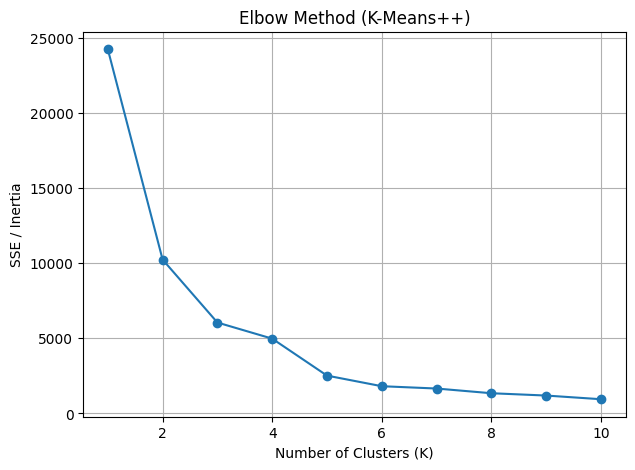

In [ ]:
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)   # this is SSE

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method (K-Means++)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE / Inertia")
plt.grid(True)
plt.show()


    Income  Score  Cluster
0       15     39        2
1       16     81        1
2       17      6        2
3       18     77        1
4       19     40        2
5       25     76        1
6       26     94        1
7       27     15        2
8       45     14        0
9       46     73        1
10      47     82        1
11      48     25        0
12      58     37        0
13      59     92        1
14      60     48        0
15      61     65        1
16      65     23        0
17      10     53        2
18      23     15        2
19      13     24        2
20      43     24        0
21      23     24        2


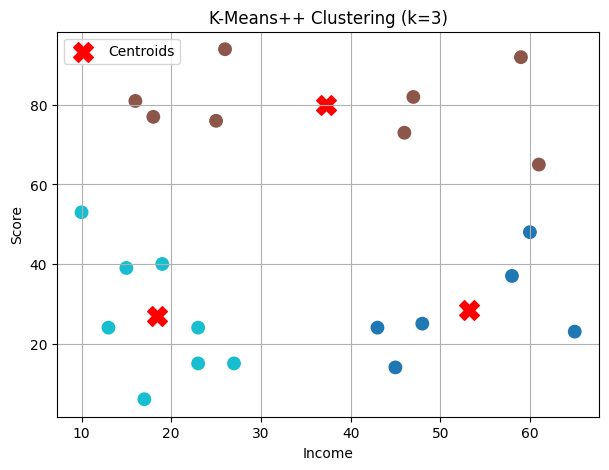

In [ ]:
best_k = 3   # change if elbow suggests another value

kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=0)
df['Cluster'] = kmeans_final.fit_predict(X)
centers = kmeans_final.cluster_centers_

print(df)

plt.figure(figsize=(7,5))
plt.scatter(df['Income'], df['Score'],
            c=df['Cluster'], cmap='tab10', s=80)

plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, marker='X', label='Centroids')

plt.title(f"K-Means++ Clustering (k={best_k})")
plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

print("Silhouette scores:")
for k in range(2, 7):   # silhouette not defined for k = 1
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k = {k}, silhouette score = {score:.4f}")


Silhouette scores:
k = 2, silhouette score = 0.4758
k = 3, silhouette score = 0.4657
k = 4, silhouette score = 0.3607
k = 5, silhouette score = 0.4893
k = 6, silhouette score = 0.4806


In [ ]:
def euclidean_distance(p, q):
    # p, q are numpy arrays like [Income, Score]
    return np.sqrt(np.sum((p - q) ** 2))

# demo
print("Distance between point 0 and 1:",
      euclidean_distance(X[0], X[1]))


Distance between point 0 and 1: 42.01190307520001


In [ ]:
def kmeans_from_scratch(X, k, max_iters=20, random_state=0):
    np.random.seed(random_state)

    # init centroids = random k points from data
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    for it in range(max_iters):
        # ---- E-STEP: assign to nearest centroid ----
        labels = []
        for point in X:
            dists = [euclidean_distance(point, c) for c in centroids]
            labels.append(np.argmin(dists))
        labels = np.array(labels)

        # ---- M-STEP: recompute centroids ----
        new_centroids = []
        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(X[np.random.randint(0, len(X))])
        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

centroids_scratch, labels_scratch = kmeans_from_scratch(X, k=5)
print("Centroids (scratch, k=5):\n", centroids_scratch)
print("Labels (scratch, k=5):\n", labels_scratch)


Centroids (scratch, k=5):
 [[19.57142857 23.28571429]
 [51.33333333 73.33333333]
 [53.16666667 28.5       ]
 [59.         92.        ]
 [19.         76.2       ]]
Labels (scratch, k=5):
 [0 4 0 4 0 4 4 0 2 1 1 2 2 3 2 1 2 4 0 0 2 0]


In [ ]:
def compute_sse(X, centroids, labels):
    sse = 0.0
    for i, point in enumerate(X):
        c = centroids[labels[i]]
        sse += np.sum((point - c) ** 2)
    return sse

sse_scratch = compute_sse(X, centroids_scratch, labels_scratch)
print("Manual SSE (scratch k=5):", sse_scratch)


Manual SSE (scratch k=5): 3585.6095238095236


In [ ]:
def dunn_index(X, labels):
    clusters = np.unique(labels)

    # max intra-cluster distance
    max_diameter = 0
    for c in clusters:
        points = X[labels == c]
        if len(points) < 2:
            continue
        for i in range(len(points)):
            for j in range(i+1, len(points)):
                d = euclidean_distance(points[i], points[j])
                if d > max_diameter:
                    max_diameter = d

    # min inter-cluster distance
    min_inter = np.inf
    for i, ci in enumerate(clusters):
        for cj in clusters[i+1:]:
            points_i = X[labels == ci]
            points_j = X[labels == cj]
            for p in points_i:
                for q in points_j:
                    d = euclidean_distance(p, q)
                    if d < min_inter:
                        min_inter = d

    if max_diameter == 0:
        return 0.0
    return min_inter / max_diameter

dunn_scratch = dunn_index(X, labels_scratch)
print("Dunn index (scratch k=5):", dunn_scratch)


Dunn index (scratch k=5): 0.3377779740177616


    Income  Score  Cluster
0       15     39        2
1       16     81        4
2       17      6        3
3       18     77        4
4       19     40        2
5       25     76        4
6       26     94        4
7       27     15        3
8       45     14        0
9       46     73        1
10      47     82        1
11      48     25        0
12      58     37        0
13      59     92        1
14      60     48        0
15      61     65        1
16      65     23        0
17      10     53        2
18      23     15        3
19      13     24        3
20      43     24        0
21      23     24        3


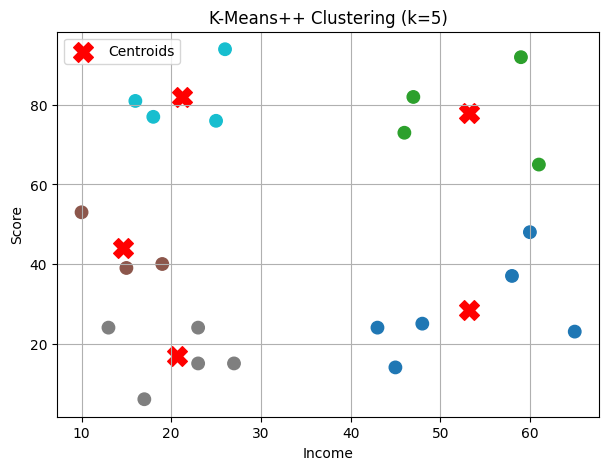

In [ ]:
best_k = 5  # from silhouette

kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=0)
df['Cluster'] = kmeans_final.fit_predict(X)
centers = kmeans_final.cluster_centers_

print(df)

plt.figure(figsize=(7,5))
plt.scatter(df['Income'], df['Score'],
            c=df['Cluster'], cmap='tab10', s=80)

plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, marker='X', label='Centroids')

plt.title(f"K-Means++ Clustering (k={best_k})")
plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()
